In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df = pd.concat([train,test],ignore_index=True)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [4]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.drop("Id", axis=1, inplace=True)

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [7]:
df.shape

(2919, 80)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
quantiles = df[numeric_columns].quantile([0, 0.05, 0.25, 0.50, 0.75, 0.95 ,1]).T

quantiles

,0.000,0.050,0.250,0.500,0.750,0.950,1.000
MSSubClass,20.000,20.000,20.000,50.000,70.000,160.000,190.000
LotFrontage,21.000,32.000,59.000,68.000,80.000,107.000,313.000
LotArea,1300.000,3182.000,7478.000,9453.000,11570.000,17142.900,215245.000
OverallQual,1.000,4.000,5.000,6.000,7.000,8.000,10.000
OverallCond,1.000,4.000,5.000,5.000,6.000,8.000,9.000
YearBuilt,1872.000,1915.000,1953.500,1973.000,2001.000,2007.000,2010.000
YearRemodAdd,1950.000,1950.000,1965.000,1993.000,2004.000,2007.000,2010.000
MasVnrArea,0.000,0.000,0.000,0.000,164.000,466.500,1600.000
BsmtFinSF1,0.000,0.000,0.000,368.500,733.000,1274.000,5644.000
BsmtFinSF2,0.000,0.000,0.000,0.000,0.000,435.000,1526.000


### Numerical and Categorical Variables

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Grab column names for given dataframe with given treshold values for
    cardinal and nominal.
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "object" or dataframe[col].nunique() < cat_th]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "object" and dataframe[col].nunique() >= cat_th and dataframe[col].nunique() <= car_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == "object" and dataframe[col].nunique() > car_th]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')

    return cat_cols, cat_but_car, num_cols

In [12]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 2919
Variables: 80
cat_cols: 53
num_cols: 5
cat_but_car: 1


### Analysis of Categorical Variables

          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856


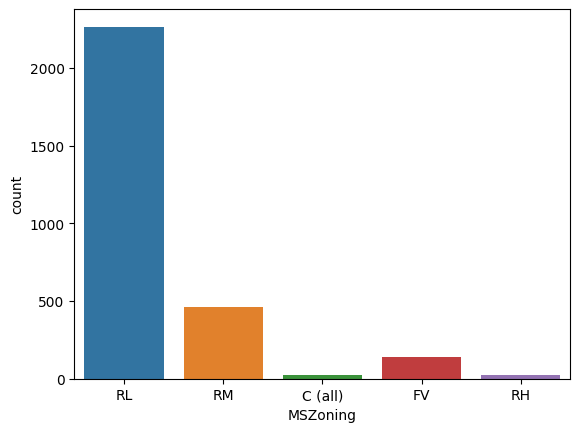

        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411


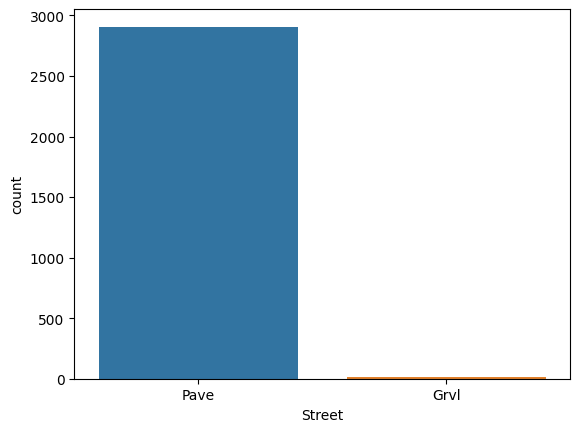

       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672


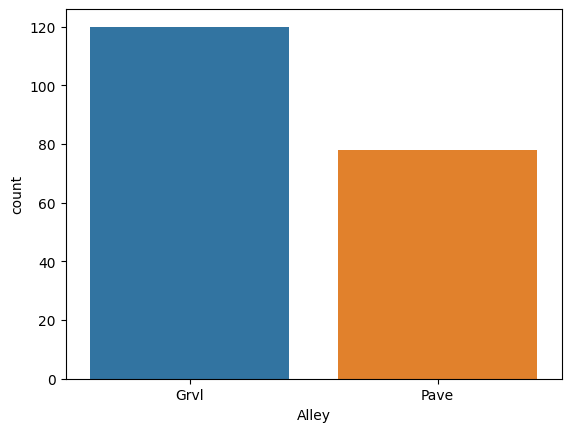

          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548


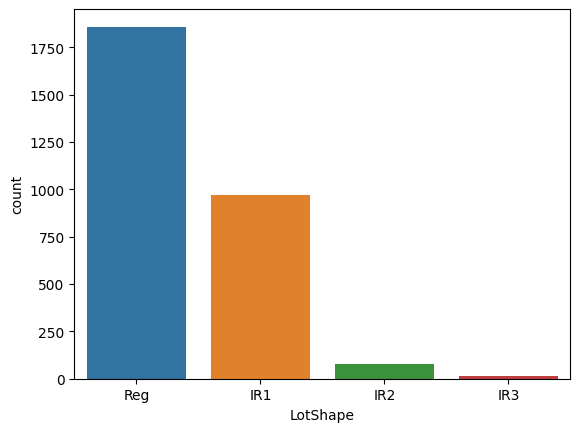

             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055


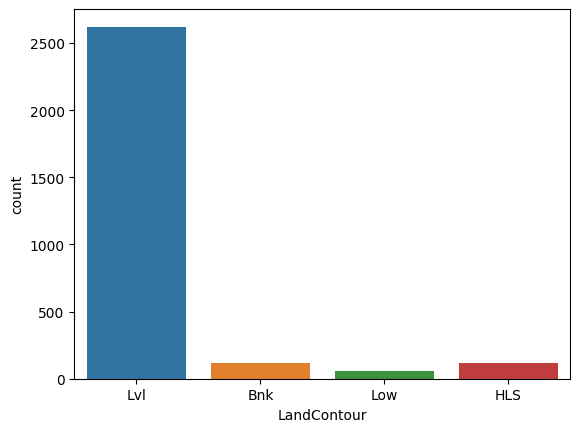

           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034


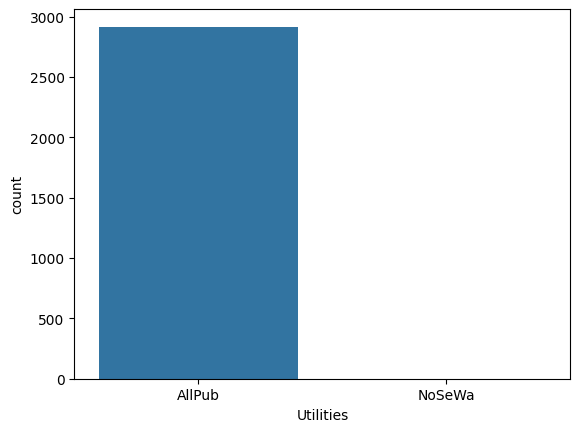

           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  0.480


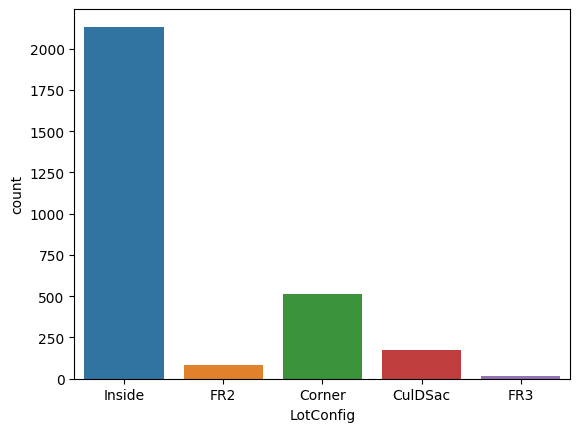

           LandSlope  Ratio
LandSlope                  
Gtl             2778 95.170
Mod              125  4.282
Sev               16  0.548


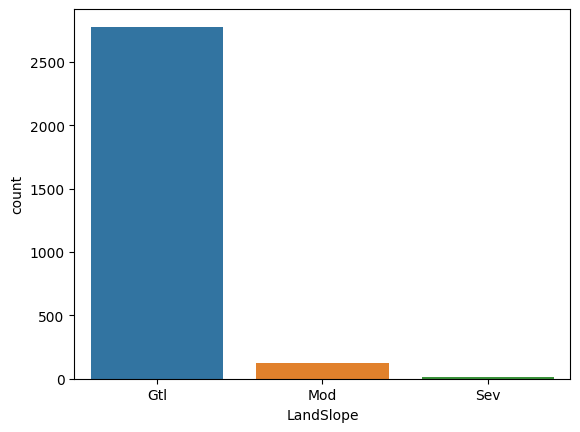

              Neighborhood  Ratio
Neighborhood                     
NAmes                  443 15.176
CollgCr                267  9.147
OldTown                239  8.188
Edwards                194  6.646
Somerst                182  6.235
NridgHt                166  5.687
Gilbert                165  5.653
Sawyer                 151  5.173
NWAmes                 131  4.488
SawyerW                125  4.282
Mitchel                114  3.905
BrkSide                108  3.700
Crawfor                103  3.529
IDOTRR                  93  3.186
Timber                  72  2.467
NoRidge                 71  2.432
StoneBr                 51  1.747
SWISU                   48  1.644
ClearCr                 44  1.507
MeadowV                 37  1.268
BrDale                  30  1.028
Blmngtn                 28  0.959
Veenker                 24  0.822
NPkVill                 23  0.788
Blueste                 10  0.343


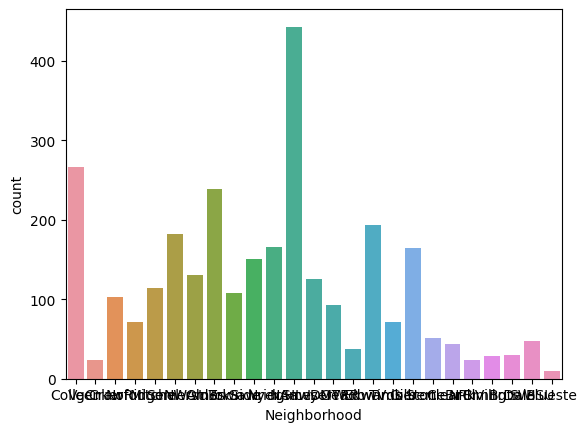

            Condition1  Ratio
Condition1                   
Norm              2511 86.023
Feedr              164  5.618
Artery              92  3.152
RRAn                50  1.713
PosN                39  1.336
RRAe                28  0.959
PosA                20  0.685
RRNn                 9  0.308
RRNe                 6  0.206


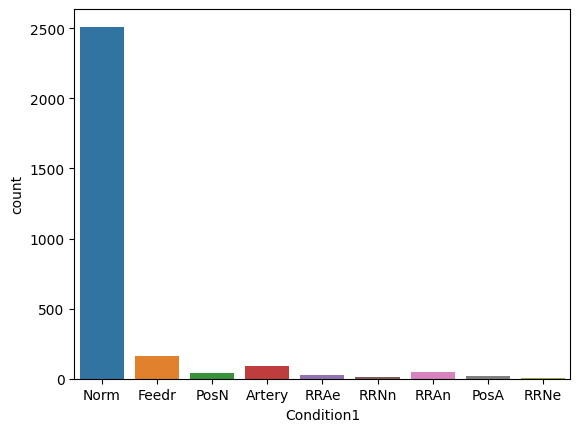

            Condition2  Ratio
Condition2                   
Norm              2889 98.972
Feedr               13  0.445
Artery               5  0.171
PosN                 4  0.137
PosA                 4  0.137
RRNn                 2  0.069
RRAn                 1  0.034
RRAe                 1  0.034


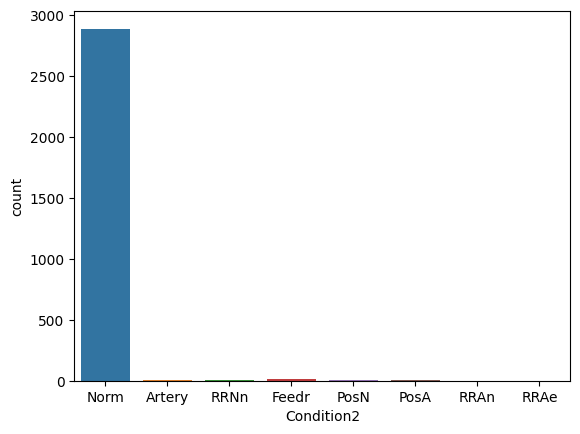

          BldgType  Ratio
BldgType                 
1Fam          2425 83.076
TwnhsE         227  7.777
Duplex         109  3.734
Twnhs           96  3.289
2fmCon          62  2.124


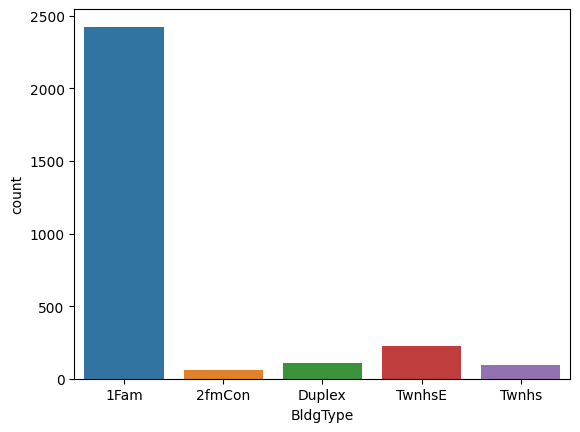

            HouseStyle  Ratio
HouseStyle                   
1Story            1471 50.394
2Story             872 29.873
1.5Fin             314 10.757
SLvl               128  4.385
SFoyer              83  2.843
2.5Unf              24  0.822
1.5Unf              19  0.651
2.5Fin               8  0.274


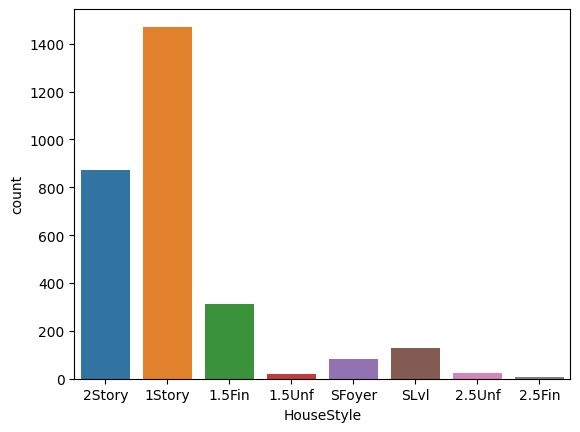

             OverallCond  Ratio
OverallCond                    
5                   1645 56.355
6                    531 18.191
7                    390 13.361
8                    144  4.933
4                    101  3.460
3                     50  1.713
9                     41  1.405
2                     10  0.343
1                      7  0.240


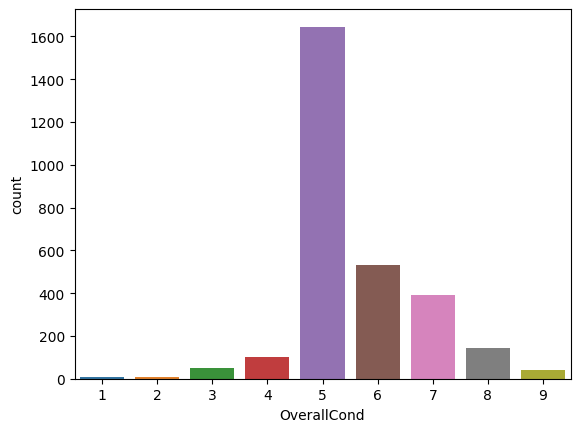

           RoofStyle  Ratio
RoofStyle                  
Gable           2310 79.137
Hip              551 18.876
Gambrel           22  0.754
Flat              20  0.685
Mansard           11  0.377
Shed               5  0.171


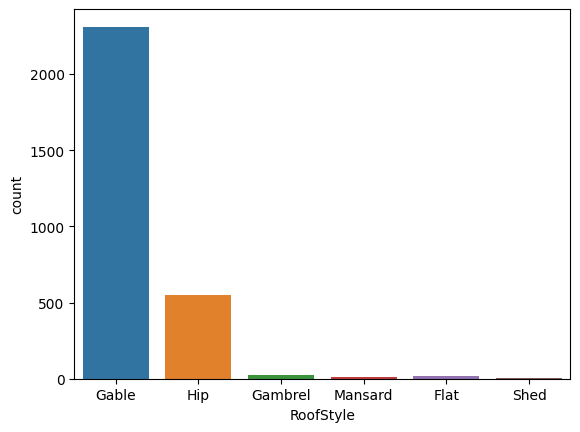

          RoofMatl  Ratio
RoofMatl                 
CompShg       2876 98.527
Tar&Grv         23  0.788
WdShake          9  0.308
WdShngl          7  0.240
Metal            1  0.034
Membran          1  0.034
Roll             1  0.034
ClyTile          1  0.034


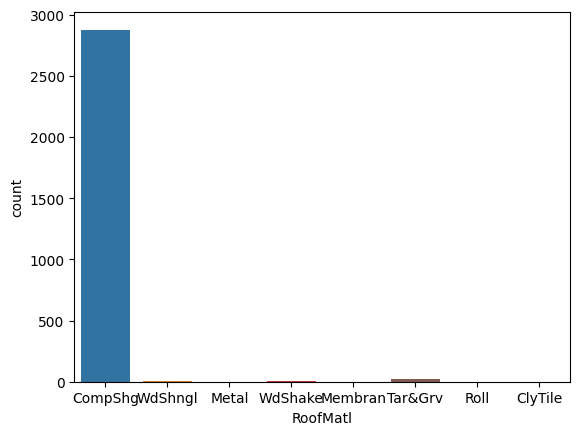

             Exterior1st  Ratio
Exterior1st                    
VinylSd             1025 35.115
MetalSd              450 15.416
HdBoard              442 15.142
Wd Sdng              411 14.080
Plywood              221  7.571
CemntBd              126  4.317
BrkFace               87  2.980
WdShing               56  1.918
AsbShng               44  1.507
Stucco                43  1.473
BrkComm                6  0.206
AsphShn                2  0.069
Stone                  2  0.069
CBlock                 2  0.069
ImStucc                1  0.034


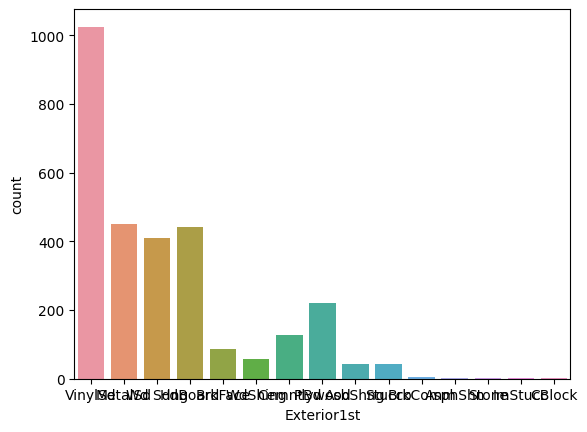

             Exterior2nd  Ratio
Exterior2nd                    
VinylSd             1014 34.738
MetalSd              447 15.313
HdBoard              406 13.909
Wd Sdng              391 13.395
Plywood              270  9.250
CmentBd              126  4.317
Wd Shng               81  2.775
BrkFace               47  1.610
Stucco                47  1.610
AsbShng               38  1.302
Brk Cmn               22  0.754
ImStucc               15  0.514
Stone                  6  0.206
AsphShn                4  0.137
CBlock                 3  0.103
Other                  1  0.034


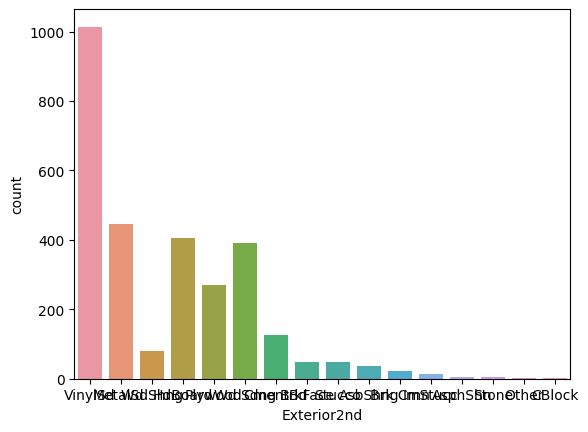

            MasVnrType  Ratio
MasVnrType                   
BrkFace            879 30.113
Stone              249  8.530
BrkCmn              25  0.856


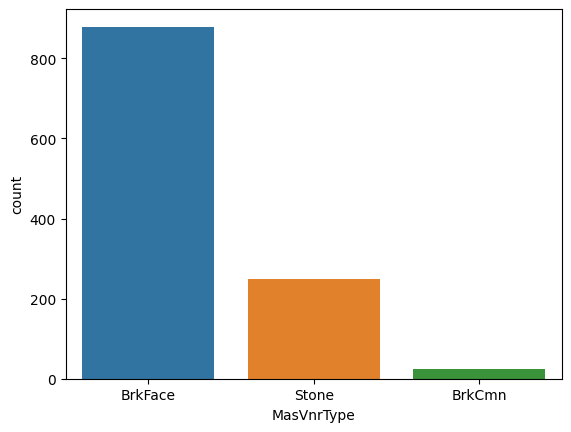

           ExterQual  Ratio
ExterQual                  
TA              1798 61.596
Gd               979 33.539
Ex               107  3.666
Fa                35  1.199


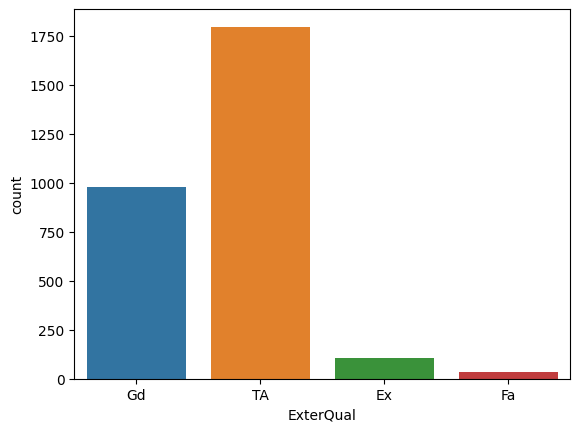

           ExterCond  Ratio
ExterCond                  
TA              2538 86.948
Gd               299 10.243
Fa                67  2.295
Ex                12  0.411
Po                 3  0.103


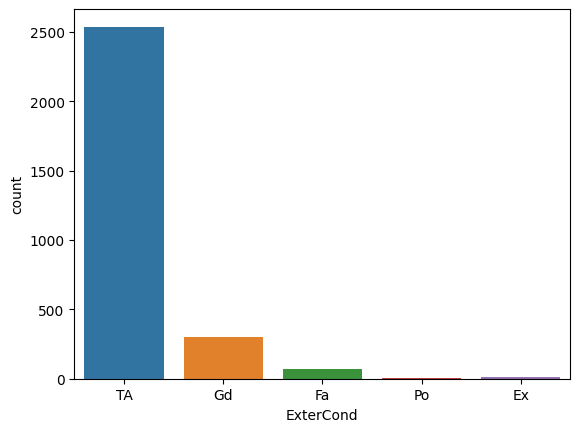

            Foundation  Ratio
Foundation                   
PConc             1308 44.810
CBlock            1235 42.309
BrkTil             311 10.654
Slab                49  1.679
Stone               11  0.377
Wood                 5  0.171


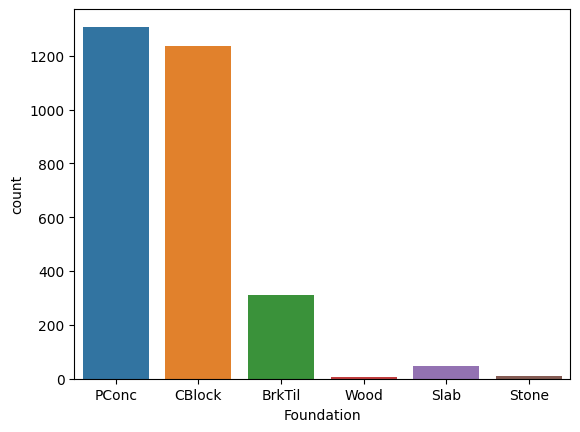

          BsmtQual  Ratio
BsmtQual                 
TA            1283 43.953
Gd            1209 41.418
Ex             258  8.839
Fa              88  3.015


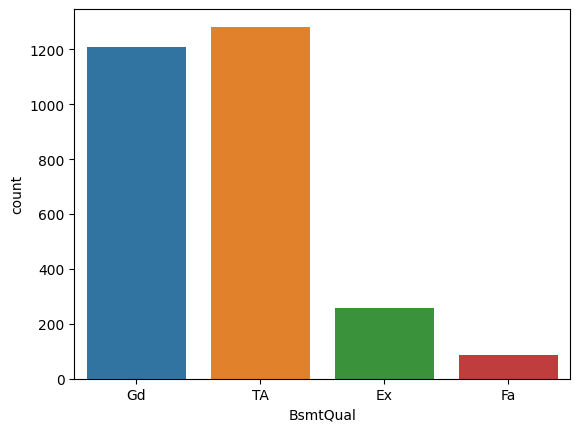

          BsmtCond  Ratio
BsmtCond                 
TA            2606 89.277
Gd             122  4.180
Fa             104  3.563
Po               5  0.171


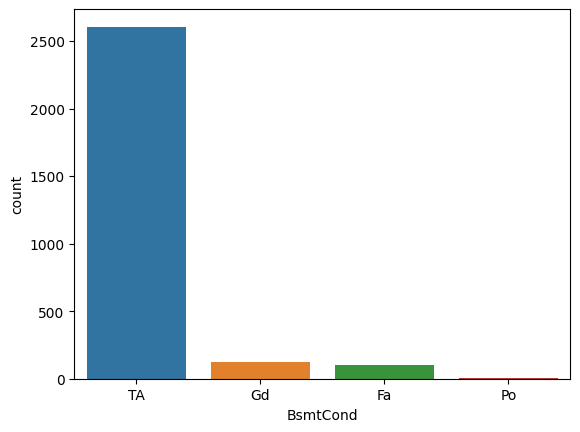

              BsmtExposure  Ratio
BsmtExposure                     
No                    1904 65.228
Av                     418 14.320
Gd                     276  9.455
Mn                     239  8.188


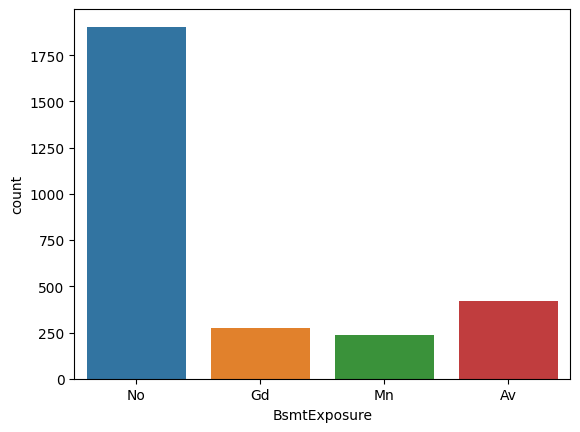

              BsmtFinType1  Ratio
BsmtFinType1                     
Unf                    851 29.154
GLQ                    849 29.085
ALQ                    429 14.697
Rec                    288  9.866
BLQ                    269  9.215
LwQ                    154  5.276


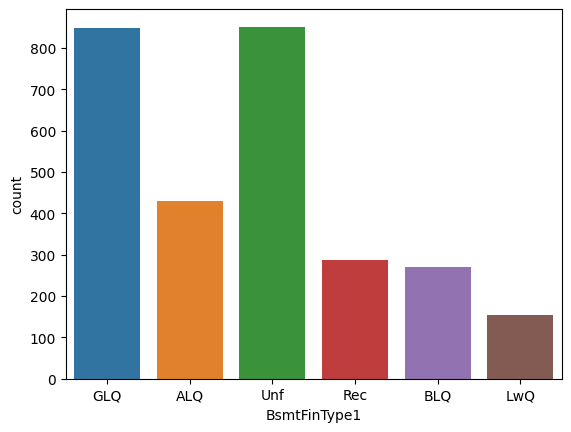

              BsmtFinType2  Ratio
BsmtFinType2                     
Unf                   2493 85.406
Rec                    105  3.597
LwQ                     87  2.980
BLQ                     68  2.330
ALQ                     52  1.781
GLQ                     34  1.165


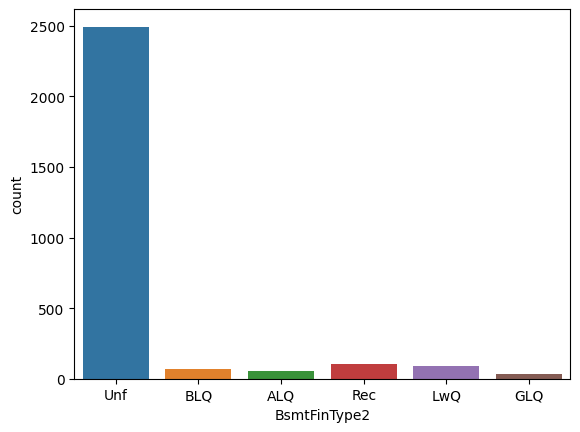

         Heating  Ratio
Heating                
GasA        2874 98.458
GasW          27  0.925
Grav           9  0.308
Wall           6  0.206
OthW           2  0.069
Floor          1  0.034


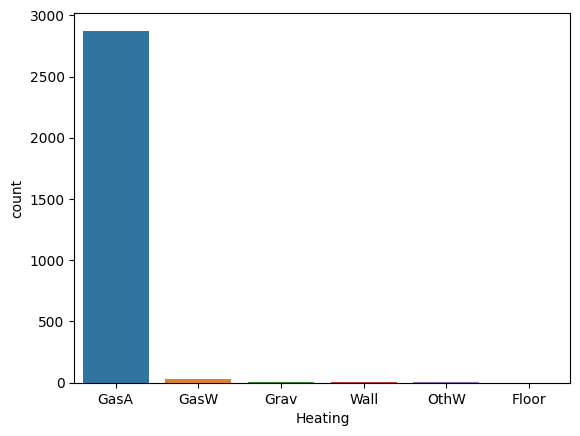

           HeatingQC  Ratio
HeatingQC                  
Ex              1493 51.148
TA               857 29.359
Gd               474 16.238
Fa                92  3.152
Po                 3  0.103


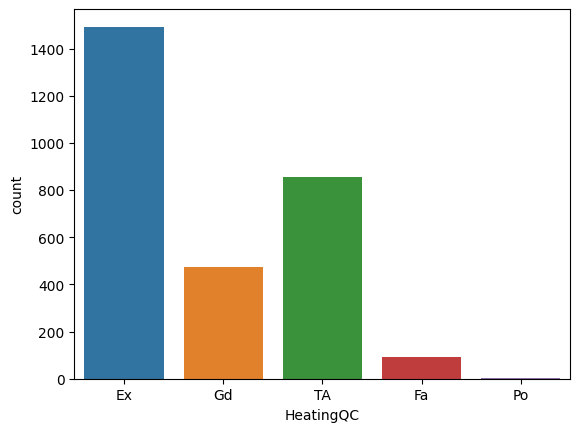

            CentralAir  Ratio
CentralAir                   
Y                 2723 93.285
N                  196  6.715


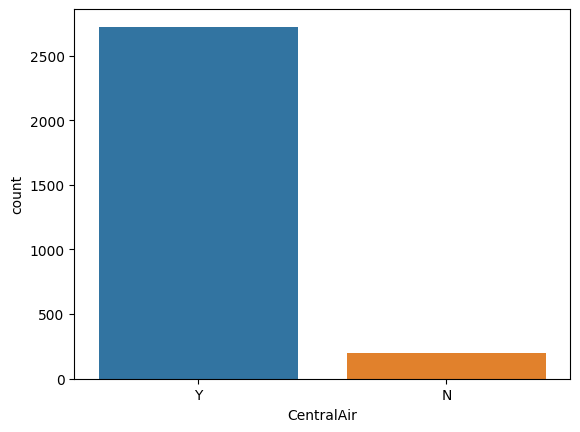

            Electrical  Ratio
Electrical                   
SBrkr             2671 91.504
FuseA              188  6.441
FuseF               50  1.713
FuseP                8  0.274
Mix                  1  0.034


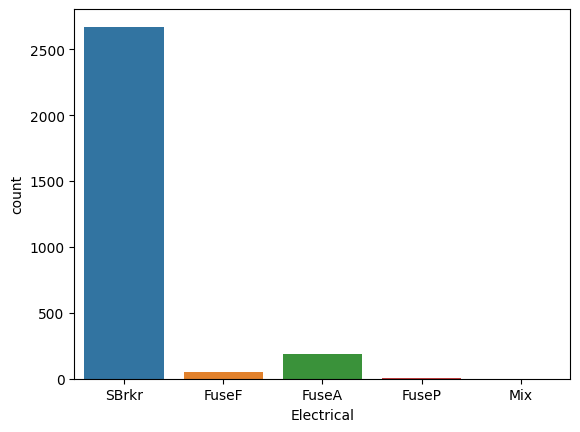

              BsmtFullBath  Ratio
BsmtFullBath                     
0.000                 1705 58.410
1.000                 1172 40.151
2.000                   38  1.302
3.000                    2  0.069


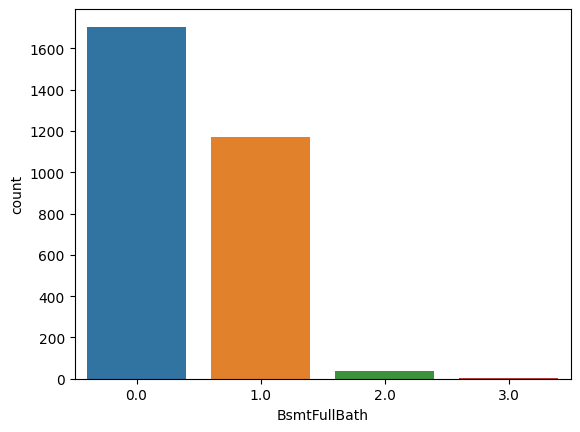

              BsmtHalfBath  Ratio
BsmtHalfBath                     
0.000                 2742 93.936
1.000                  171  5.858
2.000                    4  0.137


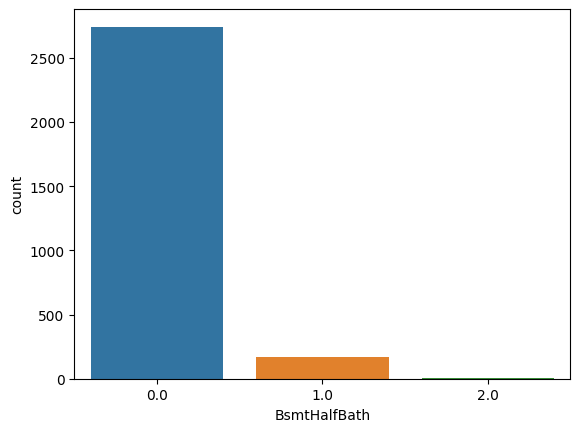

          FullBath  Ratio
FullBath                 
2             1530 52.415
1             1309 44.844
3               64  2.193
0               12  0.411
4                4  0.137


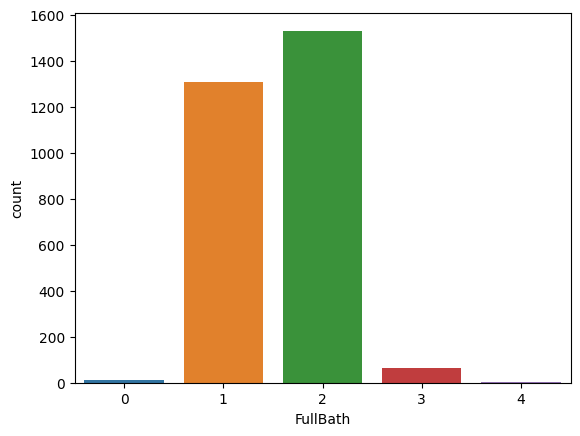

          HalfBath  Ratio
HalfBath                 
0             1834 62.830
1             1060 36.314
2               25  0.856


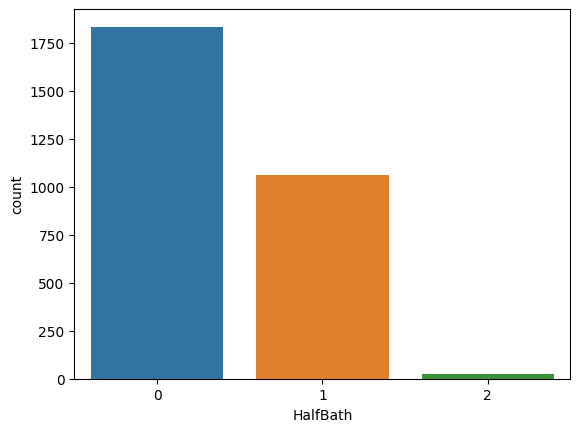

              BedroomAbvGr  Ratio
BedroomAbvGr                     
3                     1596 54.676
2                      742 25.420
4                      400 13.703
1                      103  3.529
5                       48  1.644
6                       21  0.719
0                        8  0.274
8                        1  0.034


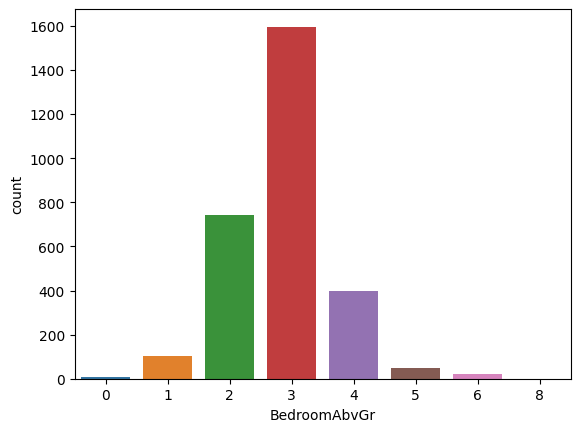

              KitchenAbvGr  Ratio
KitchenAbvGr                     
1                     2785 95.409
2                      129  4.419
0                        3  0.103
3                        2  0.069


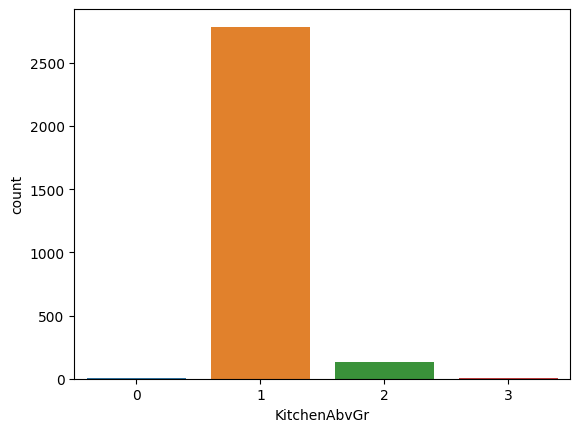

             KitchenQual  Ratio
KitchenQual                    
TA                  1492 51.113
Gd                  1151 39.431
Ex                   205  7.023
Fa                    70  2.398


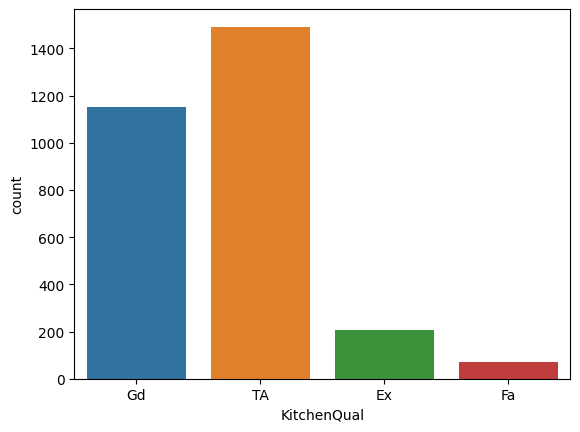

            Functional  Ratio
Functional                   
Typ               2717 93.080
Min2                70  2.398
Min1                65  2.227
Mod                 35  1.199
Maj1                19  0.651
Maj2                 9  0.308
Sev                  2  0.069


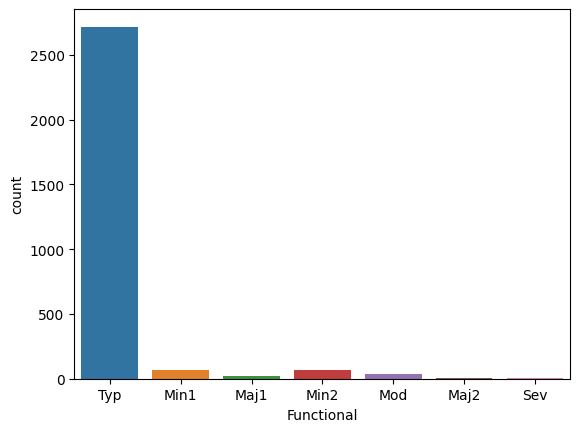

            Fireplaces  Ratio
Fireplaces                   
0                 1420 48.647
1                 1268 43.440
2                  219  7.503
3                   11  0.377
4                    1  0.034


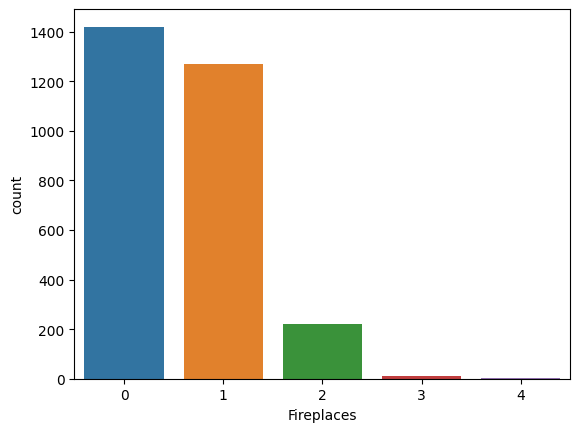

             FireplaceQu  Ratio
FireplaceQu                    
Gd                   744 25.488
TA                   592 20.281
Fa                    74  2.535
Po                    46  1.576
Ex                    43  1.473


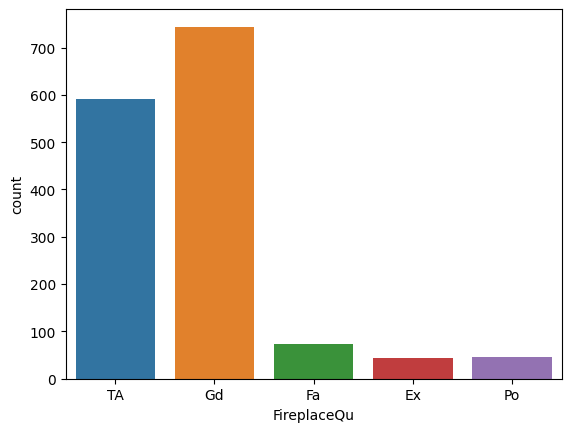

            GarageType  Ratio
GarageType                   
Attchd            1723 59.027
Detchd             779 26.687
BuiltIn            186  6.372
Basment             36  1.233
2Types              23  0.788
CarPort             15  0.514


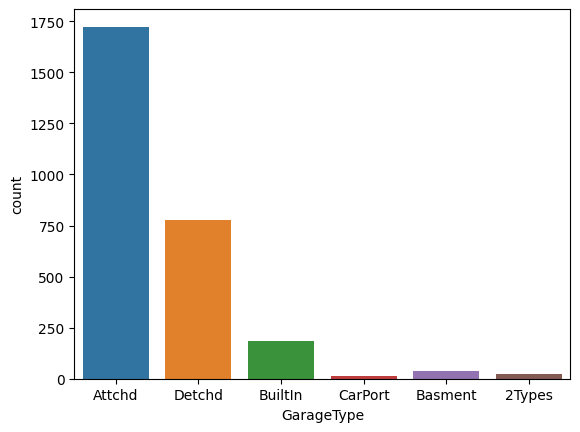

              GarageFinish  Ratio
GarageFinish                     
Unf                   1230 42.138
RFn                    811 27.783
Fin                    719 24.632


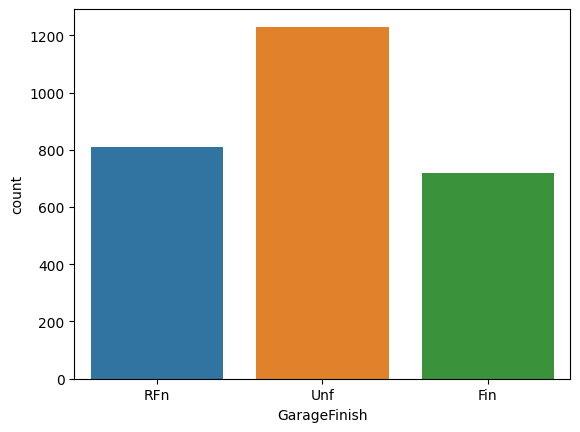

            GarageCars  Ratio
GarageCars                   
2.000             1594 54.608
1.000              776 26.584
3.000              374 12.813
0.000              157  5.379
4.000               16  0.548
5.000                1  0.034


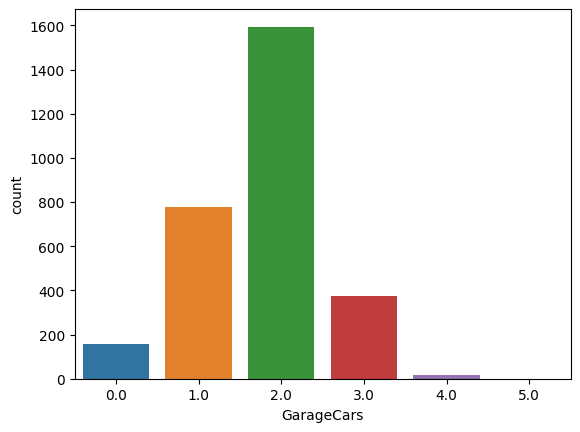

            GarageQual  Ratio
GarageQual                   
TA                2604 89.209
Fa                 124  4.248
Gd                  24  0.822
Po                   5  0.171
Ex                   3  0.103


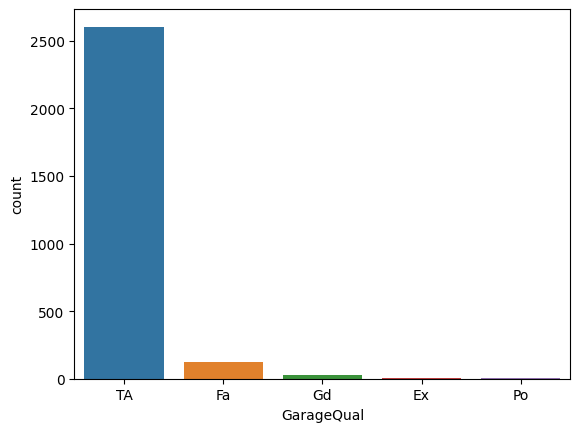

            GarageCond  Ratio
GarageCond                   
TA                2654 90.922
Fa                  74  2.535
Gd                  15  0.514
Po                  14  0.480
Ex                   3  0.103


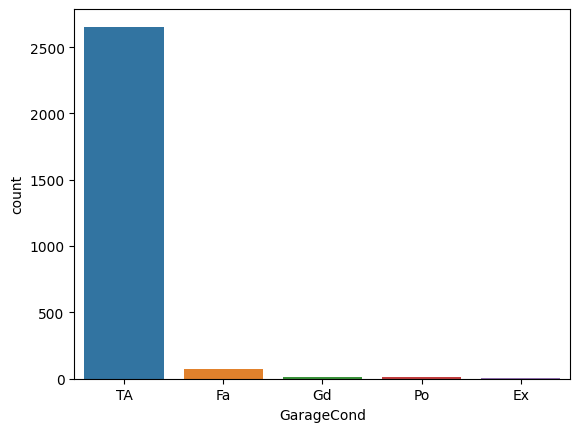

            PavedDrive  Ratio
PavedDrive                   
Y                 2641 90.476
N                  216  7.400
P                   62  2.124


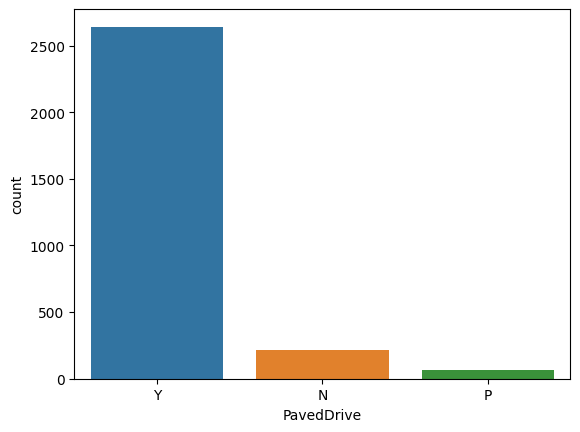

        PoolQC  Ratio
PoolQC               
Ex           4  0.137
Gd           4  0.137
Fa           2  0.069


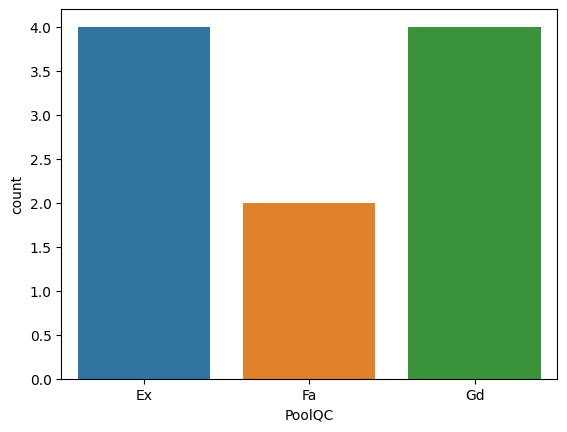

       Fence  Ratio
Fence              
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411


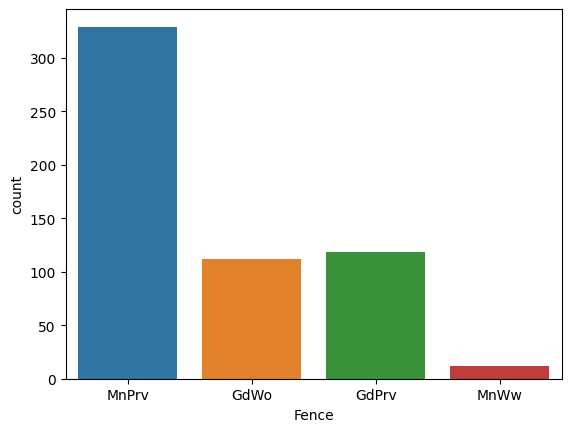

             MiscFeature  Ratio
MiscFeature                    
Shed                  95  3.255
Gar2                   5  0.171
Othr                   4  0.137
TenC                   1  0.034


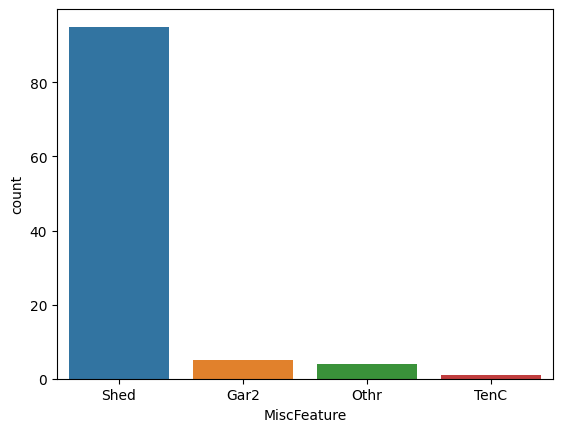

        YrSold  Ratio
YrSold               
2007       692 23.707
2009       647 22.165
2008       622 21.309
2006       619 21.206
2010       339 11.614


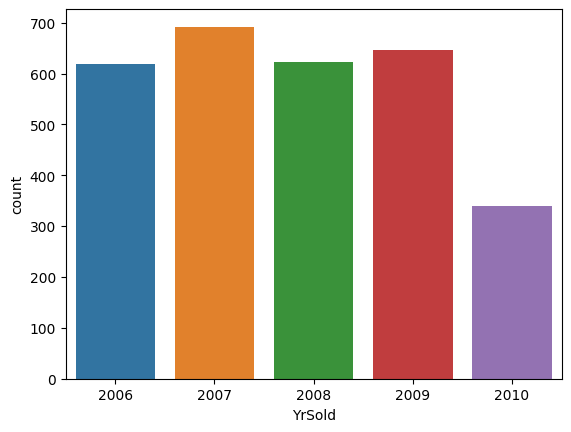

          SaleType  Ratio
SaleType                 
WD            2525 86.502
New            239  8.188
COD             87  2.980
ConLD           26  0.891
CWD             12  0.411
ConLI            9  0.308
ConLw            8  0.274
Oth              7  0.240
Con              5  0.171


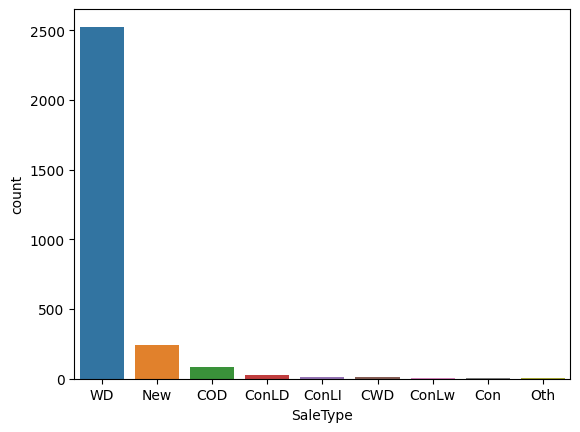

               SaleCondition  Ratio
SaleCondition                      
Normal                  2402 82.288
Partial                  245  8.393
Abnorml                  190  6.509
Family                    46  1.576
Alloca                    24  0.822
AdjLand                   12  0.411


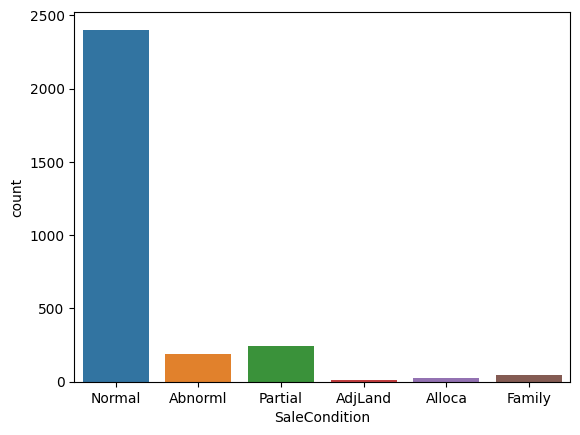

In [13]:
def cat_summary(dataframe, cat_cols, plot=True):
    for col_name in cat_cols:
        summary = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               'Ratio':100 * dataframe[col_name].value_counts()/ len(dataframe)})
        print(summary)
        
        if plot:
            sns.countplot(x = dataframe[col_name], data = dataframe)
            plt.show()
            
cat_summary(df, cat_cols)            

### Analysis of Numerical Variables

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


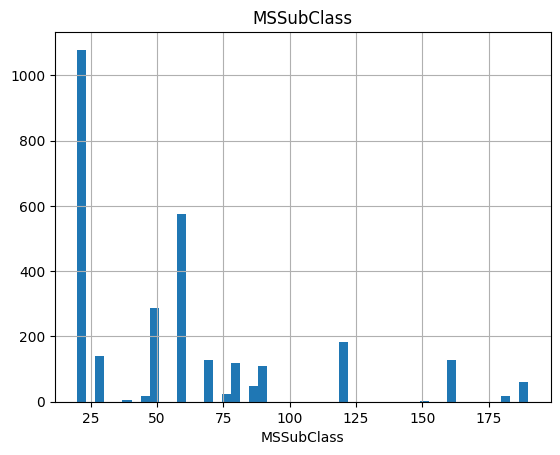

--------------------------------------------------------------------------------
count   2919.000
mean       6.089
std        1.410
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


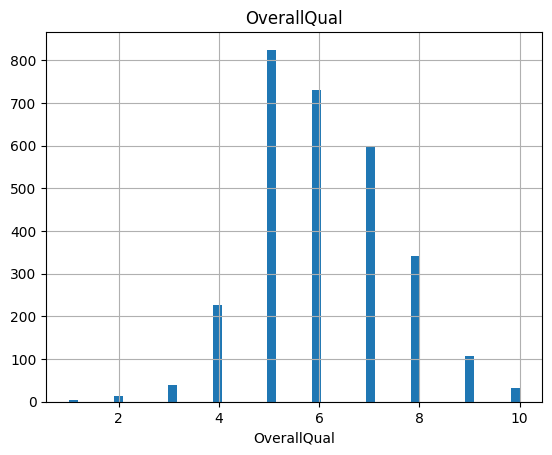

--------------------------------------------------------------------------------
count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


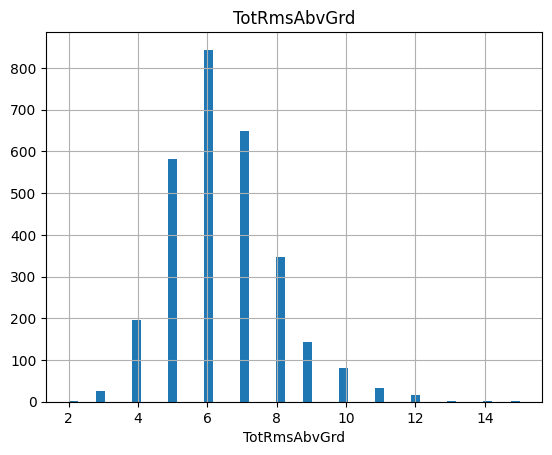

--------------------------------------------------------------------------------
count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64


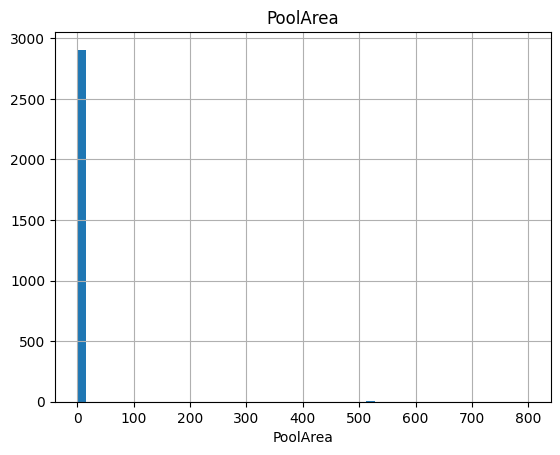

--------------------------------------------------------------------------------
count   2919.000
mean       6.213
std        2.715
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


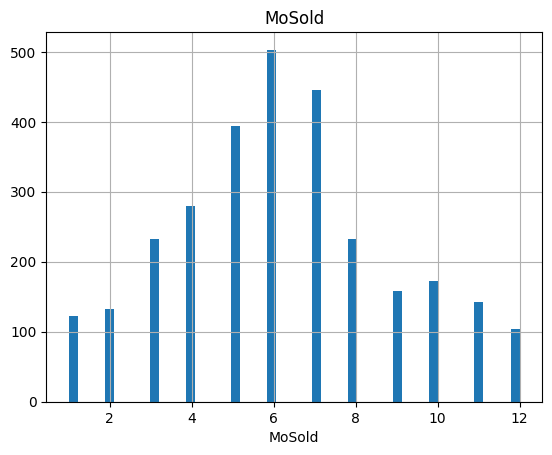

--------------------------------------------------------------------------------


In [14]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    col_summary = dataframe[numerical_col].describe(percentiles=quantiles).T
    print(col_summary)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("--------------------------------------------------------------------------------")

for col in num_cols:
    num_summary(df, col, True)

### Analysis of Target Variables

In [15]:
def target_summary_with_cat(dataframe, target, categorical_col, plot = False):
    summary = dataframe.groupby(categorical_col)[target].mean().reset_index(name="TARGET_MEAN")
    print(summary, end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "SalePrice", col)

  MSZoning  TARGET_MEAN
0  C (all)    74528.000
1       FV   214014.062
2       RH   131558.375
3       RL   191004.995
4       RM   126316.830


  Street  TARGET_MEAN
0   Grvl   130190.500
1   Pave   181130.539


  Alley  TARGET_MEAN
0  Grvl   122219.080
1  Pave   168000.585


  LotShape  TARGET_MEAN
0      IR1   206101.665
1      IR2   239833.366
2      IR3   216036.500
3      Reg   164754.818


  LandContour  TARGET_MEAN
0         Bnk   143104.079
1         HLS   231533.940
2         Low   203661.111
3         Lvl   180183.747


  Utilities  TARGET_MEAN
0    AllPub   180950.957
1    NoSeWa   137500.000


  LotConfig  TARGET_MEAN
0    Corner   181623.426
1   CulDSac   223854.617
2       FR2   177934.574
3       FR3   208475.000
4    Inside   176938.048


  LandSlope  TARGET_MEAN
0       Gtl   179956.800
1       Mod   196734.138
2       Sev   204379.231


   Neighborhood  TARGET_MEAN
0       Blmngtn   194870.882
1       Blueste   137500.000
2        BrDale   104493.750
3       BrkSide

##### Dependent Variable

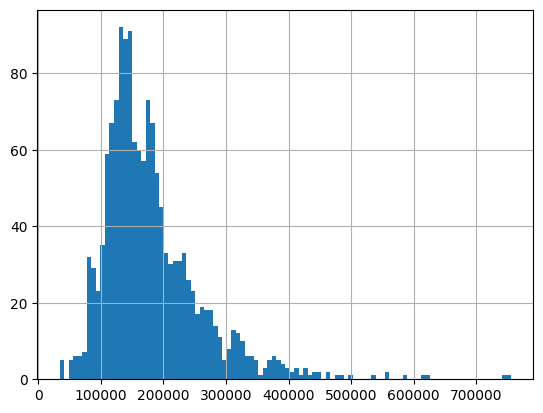

In [16]:
df['SalePrice'].hist(bins=100)
plt.show()